<a href="https://colab.research.google.com/github/camilacastano/K-Net95-Alzheimer/blob/main/prueba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANALISIS DE DATOS (DICIEMBRE, ENERO, FEBRERO, MARZO, ABRIL, MAYO)(2020-2021)

Primero, se importan las librerías para la manipulación correcta de los datos

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt

Y se importan los datos

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Ya con el documento a la mano, para hacer una pequeña visualización de los primeros 10 negocios y observar cuales son las variables a analizar

In [4]:
clientes=pd.read_excel('/content/drive/MyDrive/BI-DataAnalyst/BI-DataAnalyst/BI-DataAnalyst/BBDD_pruebaBI.xlsx')
clientes.head(10)

,Id_comercio,Fecha vinculación datafono,Fecha de creacion comercio,Categoria comercio,Sub Categoria comercio,Id_terminal,Ciudad,Fecha 1ra_transaccion,Monto ventas Acumulado,Monto ventas ultimo mes,Cantidad transacciones acumuladas a la fecha
0,003QDVFJCJ,"mar. 26, 2021 12:40pm","mar. 26, 2021 12:17pm",Comercio detallista,Ropa / Accesorios,1299,Bogotá D.C.,"mar. 26, 2021 12:42pm",6542000,1240000,44
1,008LJH6YHN,"feb. 10, 2021 3:31pm","feb. 10, 2021 3:15pm",Belleza y cuidado personal,Spa,591,Bogotá D.C.,"feb. 10, 2021 3:34pm",4380000,1102000,16
2,00B3DGV62G,"mar. 3, 2021 3:26pm","mar. 3, 2021 3:09pm",Comercio detallista,Auto partes,2130,Bogotá D.C.,"mar. 3, 2021 3:30pm",11892500,1297000,89
3,00ILW1BB3Y,"mar. 24, 2021 12:45pm","mar. 24, 2021 12:33pm",Comercio detallista,Tienda naturista,662,Bogotá D.C.,"mar. 24, 2021 12:51pm",372500,74500,12
4,01AK7UX4UU,"mar. 30, 2021 1:50pm","mar. 30, 2021 1:40pm",Comercio detallista,Tecnología,1784,Mosquera,"mar. 30, 2021 1:52pm",165500,0,4
5,01OB36KP84,"dic. 10, 2020 2:41pm","dic. 10, 2020 2:23pm",Alimentos y bebidas,Restaurante / Café,699,Bogotá D.C.,"dic. 10, 2020 7:57pm",104000,25500,8
6,01PFUX10Z9,"mar. 29, 2021 7:59pm","mar. 29, 2021 7:22pm",Alimentos y bebidas,Comida rápida,1192,Bogotá D.C.,"mar. 29, 2021 8:00pm",1104380,208250,52
7,024EE2F9LX,"mar. 1, 2021 1:24pm","mar. 1, 2021 1:16pm",Comercio detallista,Auto partes,1244,Soacha,"mar. 1, 2021 1:27pm",2000,0,2
8,0254G0047E,"mar. 24, 2021 1:31pm","mar. 24, 2021 1:27pm",Comercio detallista,Óptica,2580,Bogotá D.C.,"mar. 24, 2021 1:43pm",2265000,0,15
9,0355B2ZSMZ,"mar. 27, 2021 4:58pm","mar. 27, 2021 4:50pm",Alimentos y bebidas,Restaurante / Café,1841,Suaita,"mar. 27, 2021 5:00pm",1610100,270100,25


**PROCESAMIENTO DE LOS DATOS**

Lo más importante para comenzar, es el preprocesamientos de los datos. Con este análisis inicial, se podran determinar cuales son las variables mas relevantes para encontrar claves que permitan la obtención de mejores decisiones para el futuro de la empresa.

Primero, se realizará la limpieza y ordenamiento de los datos para tener claro ciertos patrones de venta y movimiento económico durante los últimos 6 meses.

Como se puede observar en la siguiente celda, en la variable *Fecha 1ra_transaccion* existen 21 valores nulos, con lo cual, se investigarán más a fondo para determinar por qué se encuentran de esta manera.

Estos pueden deberse a una falta de datos en el índice específico o por una falta de correcto registro en la base de datos.

In [5]:
clientes.isnull().sum()

Id_comercio                                      0
Fecha vinculación datafono                       0
Fecha de creacion comercio                       0
Categoria comercio                               0
Sub Categoria comercio                           0
Id_terminal                                      0
Ciudad                                           0
Fecha 1ra_transaccion                           21
Monto ventas Acumulado                           0
Monto ventas ultimo mes                          0
Cantidad transacciones acumuladas a la fecha     0
dtype: int64

Fue necesario hacer un cambio de idioma en las abreviaturas de los meses para poder hacer el paso de *str* a *datetime* y obtener cuales son las filas que poseen estos valores nulos.

In [6]:
trad = {
        'ene': 'jan',
        'feb': 'feb',
        'abr': 'apr',
        'ago': 'aug',
        'dic': 'dec'
       }

# Aplicar la traducción a cada columna por separado
clientes['Fecha vinculación datafono'] = clientes['Fecha vinculación datafono'].replace(trad, regex=True)
clientes['Fecha de creacion comercio'] = clientes['Fecha de creacion comercio'].replace(trad, regex=True)
clientes['Fecha 1ra_transaccion'] = clientes['Fecha 1ra_transaccion'].replace(trad, regex=True)

Luego de haber realizado este cambio, será posible extraer estos 21 valores nulos que se encuentran en la base de datos. Primero, se realizó el cambio de formato para obtener las variables tipo *datetime* para todas las columnas que contuvieran fechas. Despúes se obtuvo un dataframe que se denomina **fila_problematicas** y así tener una mejor visualización del por qué los datos de las fechas fueron nulos.



In [7]:
clientes_original = clientes.copy()

clientes['Fecha 1ra_transaccion'] = pd.to_datetime(clientes['Fecha 1ra_transaccion'], format='%b. %d, %Y %I:%M%p', errors='coerce')
clientes['Fecha vinculación datafono'] = pd.to_datetime(clientes['Fecha vinculación datafono'], format='%b. %d, %Y %I:%M%p', errors='coerce')
clientes['Fecha de creacion comercio'] = pd.to_datetime(clientes['Fecha de creacion comercio'], format='%b. %d, %Y %I:%M%p', errors='coerce')

#Filtrar las filas problemáticas y guardarlas en otro dataframe
filas_problematicas = clientes[clientes['Fecha 1ra_transaccion'].isnull()]

#Imprimir las filas problemáticas
print("Filas con fechas problemáticas:")
filas_problematicas

Filas con fechas problemáticas:


,Id_comercio,Fecha vinculación datafono,Fecha de creacion comercio,Categoria comercio,Sub Categoria comercio,Id_terminal,Ciudad,Fecha 1ra_transaccion,Monto ventas Acumulado,Monto ventas ultimo mes,Cantidad transacciones acumuladas a la fecha
981,BC3E6Z902F,2021-02-19 00:18:00,2021-02-17 21:13:00,Comercio detallista,Tecnología,2430,Bogotá D.C.,NaT,0,0,0
1056,C2LTJZTRTQ,2020-12-15 16:29:00,2020-12-15 15:33:00,Belleza y cuidado personal,Distribuidora,627,Bogotá D.C.,NaT,0,0,0
1185,DI7S77HE83,2021-03-30 11:27:00,2021-03-30 11:11:00,Comercio detallista,Ropa / Accesorios,1434,Bogotá D.C.,NaT,0,0,1
1248,EAG2VA3X5E,2021-03-30 12:17:00,2021-03-30 12:10:00,Reparación y limpieza,Automotriz y autopartes,1020,Jamundí,NaT,0,0,0
1319,F5T78LFMR3,2021-03-30 15:29:00,2021-03-29 09:50:00,Alimentos y bebidas,Repostería / Panadería,113,Cali,NaT,0,0,0
1378,FTSS1Y19KR,2021-03-18 15:06:00,2021-03-18 14:56:00,Comercio detallista,Tecnología,2696,Bogotá D.C.,NaT,0,0,0
1446,GPEGEY7BX3,2021-03-19 13:04:00,2021-03-19 12:54:00,Alimentos y bebidas,Comida rápida,1205,Bogotá D.C.,NaT,0,0,6
1751,K81AB3YYWE,2021-02-15 11:48:00,2021-02-12 11:35:00,Alimentos y bebidas,Restaurante / Café,991,Bogotá D.C.,NaT,0,0,0
1752,K81AB3YYWE,2021-02-15 11:49:00,2021-02-12 11:35:00,Alimentos y bebidas,Restaurante / Café,987,Bogotá D.C.,NaT,0,0,0
1918,MAN4695RE8,2021-03-18 14:05:00,2021-03-18 13:50:00,Servicios,Tecnología y software,2824,Bogotá D.C.,NaT,0,0,1


La tabla anterior presenta las 21 filas que tienen valores nulos en la fecha de la primera transacción. También puede observarse que la mayoría de estos datafonos no presentaron su primera transacción a partir de los valores presentados en las columnas *Monto ventas Acumuladas, Monto ventas ultimo mes, Cantidad transacciones acumuladas a la fecha* con lo cual puede determinarse el por qué no existe un dato que determine la primera fecha de transacción.

Es evidente que estos no presentaron ningun valor monetario durante los últimos 6 meses, sin embargo, 7 de los 21 datafonos si presentaron transacción a lo largo de este tiempo. Esto puede deberse a un error en la introducción de los datos.

Debido a las razones anteriores y al evidente poco uso de estos datafonos, para este estudio se decidio hacer una eliminación de los 21 valores presentados en el dataframe *filas_problematicas*. También cabe aclarar que estos datos no representan ni el 1% de todos los datafonos, por lo que por ahora se considerarán irrelevantes.

In [8]:
clientes_limpio=clientes.dropna()

print("Tabla correcta clientes")
clientes_limpio

Tabla correcta clientes


,Id_comercio,Fecha vinculación datafono,Fecha de creacion comercio,Categoria comercio,Sub Categoria comercio,Id_terminal,Ciudad,Fecha 1ra_transaccion,Monto ventas Acumulado,Monto ventas ultimo mes,Cantidad transacciones acumuladas a la fecha
0,003QDVFJCJ,2021-03-26 12:40:00,2021-03-26 12:17:00,Comercio detallista,Ropa / Accesorios,1299,Bogotá D.C.,2021-03-26 12:42:00,6542000,1240000,44
1,008LJH6YHN,2021-02-10 15:31:00,2021-02-10 15:15:00,Belleza y cuidado personal,Spa,591,Bogotá D.C.,2021-02-10 15:34:00,4380000,1102000,16
2,00B3DGV62G,2021-03-03 15:26:00,2021-03-03 15:09:00,Comercio detallista,Auto partes,2130,Bogotá D.C.,2021-03-03 15:30:00,11892500,1297000,89
3,00ILW1BB3Y,2021-03-24 12:45:00,2021-03-24 12:33:00,Comercio detallista,Tienda naturista,662,Bogotá D.C.,2021-03-24 12:51:00,372500,74500,12
4,01AK7UX4UU,2021-03-30 13:50:00,2021-03-30 13:40:00,Comercio detallista,Tecnología,1784,Mosquera,2021-03-30 13:52:00,165500,0,4
...,...,...,...,...,...,...,...,...,...,...,...
3066,ZYU8UUM32R,2021-03-11 11:24:00,2021-03-11 11:14:00,Comercio detallista,Tecnología,2829,Bogotá D.C.,2021-03-11 11:30:00,26110920,4912000,34
3067,ZYV1ZCZ7IM,2021-03-25 14:46:00,2021-03-25 14:36:00,Servicios,Tecnología y software,1348,Bogotá D.C.,2021-03-25 14:47:00,4400500,491000,16
3068,ZZJ3KWF9VC,2021-03-19 16:09:00,2021-03-19 16:00:00,Alimentos y bebidas,Restaurante / Café,2938,Bogotá D.C.,2021-03-19 16:12:00,65100,20000,6
3069,ZZMG2NE0Q6,2021-03-12 11:05:00,2021-03-12 10:49:00,Comercio detallista,Elementos de seguridad,1908,Bogotá D.C.,2021-03-12 11:06:00,300000,149000,8


Luego de omitir estos datos, se obtiene el dataframe *clientes* que ya se encuentra limpio de valores nulos y con los tipos de datos correctos. Sobre este trabajaremos para realizar el análisis.

In [9]:
clientes_limpio.isnull().sum()

Id_comercio                                     0
Fecha vinculación datafono                      0
Fecha de creacion comercio                      0
Categoria comercio                              0
Sub Categoria comercio                          0
Id_terminal                                     0
Ciudad                                          0
Fecha 1ra_transaccion                           0
Monto ventas Acumulado                          0
Monto ventas ultimo mes                         0
Cantidad transacciones acumuladas a la fecha    0
dtype: int64

Es necesario recordar que hay empresas pueden tener más de un datafono. Con las variables *Id_comercio* y *Id_terminal* puede determinarse la cantidad de negocios que hay en la empresa y la cantidad de datafonos que hay activos.

Se sabe que en la base, es posible obtener la repetición de la identificación de la empresa ya que tienen mas de un datafono. Obteniendo 3004 empresas activas:

In [10]:
clientes_limpio['Id_comercio'].nunique()

3004

Mientras que los datafonos poseen una identificación irrepetible, se puede saber que existen 3050 activos dentro de las empresas:

In [11]:
clientes_limpio['Id_terminal'].nunique()

3050

Existen factores importantes dentro de esta base que nos permitirá realizar un mejor análisis para saber cuales podrían ser los pasos a seguir para la expansión de la empresa.

Se realizó una gráfica de barras que contiene los sectores de comercio en los cuales se encuentran las empresas a las cuales les brindamos los datafonos junto con la sumatoria de las ventas acumuladas para cada sección.

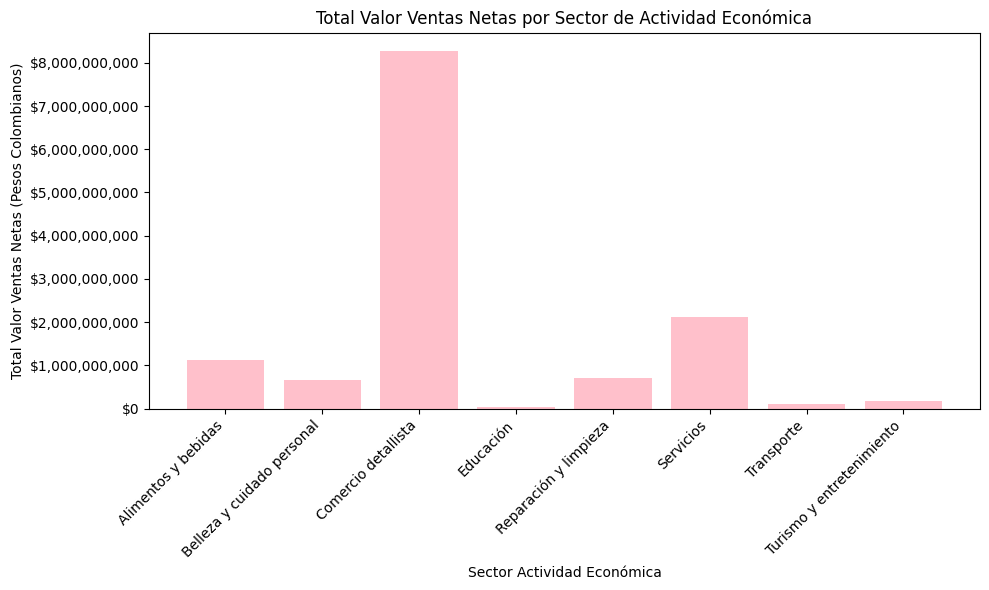

In [12]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

suma_ventas_por_industria = clientes_limpio.groupby('Categoria comercio')['Monto ventas Acumulado'].sum()
sectores = suma_ventas_por_industria.index.tolist()
ventas_netas_sectores = suma_ventas_por_industria.values.tolist()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(sectores, ventas_netas_sectores, color='pink')
plt.xlabel('Sector Actividad Económica')
plt.ylabel('Total Valor Ventas Netas (Pesos Colombianos)')
plt.title('Total Valor Ventas Netas por Sector de Actividad Económica')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejor visualización
plt.tight_layout()  # Ajustar el diseño para evitar solapamientos

# Formatear el eje y para mostrar valores en millones de pesos
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f"${y:,.0f}"))

plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejor visualización
plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
plt.show()

La gráfica basicamente presenta cuales son los sectores más exitosos en cuanto a ventas acumuladas de las empresas.

También es importante determinar para tener en cuenta la gráfica anterior, la cantidad de negocios que existen dentro de estas categorías. Siendo los más frecuentes **Comercio detallista** y **Servicios**. Puede verse también que existen muy pocos negocios basados en **Turismo y entretenimiento** y **Educación** teniendo en cuenta que también son los que menores ganancias estan obteniendo.

In [13]:
clientes_limpio['Categoria comercio'].sort_values().value_counts()

Categoria comercio
Comercio detallista           1650
Servicios                      520
Alimentos y bebidas            384
Belleza y cuidado personal     209
Reparación y limpieza          166
Transporte                      76
Turismo y entretenimiento       35
Educación                       10
Name: count, dtype: int64

Es necesario también tener en cuenta la ubicación y cantidad de negocios que estan bajo la empresa. Puede observarse en la siguiente celda que **Bogotá D.C.** y **Soacha** son las ciudades que más negocios tienen involucrados en la empresa con un 86% de la totalidad de los datos.

Este es un dato importante el cual será comparado con una base de datos brindada por la Cámara de Comercio de Bogotá para una posible expansión que partiría de la capital a las ciudades alrededor basado en los sectores comerciales más populares de los últimos 6 meses.

In [14]:
clientes_limpio['Ciudad'].value_counts()

Ciudad
Bogotá  D.C.      2459
Soacha             182
Cali               106
Fusagasugá          38
Chía                31
                  ... 
Juan de Acosta       1
Tuluá                1
Caldas               1
La Mesa              1
Chaparral            1
Name: count, Length: 63, dtype: int64

# BASE DE DATOS (CÁMARA DE COMERCIO DE BOGOTÁ)

La página proporcionada de la cámara presenta una base de datos que contiene todos los negocios presentes en el departamento de Cundinamarca e diferentes años y trimestres. Contiene negocios tanto antiguos como nuevos creados por empresarios y pequeños negociantes.

Para oder hacere un análisis correcto dentro de una gran cantidad de datos, es necesario utilizar algunos filtros. Se eligió el año 2021 y su 1° trimestre (Enero, Febrero y Marzo) ya que se podrá hacer una comparación de mercados entre los datos de la empresa y los datos presentados por la cámara de los diferentes negocios que se encuentran registrados en Cundinamarca.

In [15]:
datos_camara=pd.read_csv('/content/drive/MyDrive/BI-DataAnalyst/BI-DataAnalyst/BI-DataAnalyst/2021_1 Trimestre_Persona Natural y Persona Juridica.csv', encoding='utf-16')
datos_camara.head()

,Indicador,Período,Año,Organización Jurídica,Tamaño,Sector,Sección Actividad Económica,CIIU,Cantidad de Establecimientos,Personal Ocupado,...,País,Departamento,Municipio,Localidad,Barrio,Cantidad Total,Total Valor Activos,Total Valor Pasivos,Total Valor Patrimonio,Total Valor Ventas Netas
0,Matricula Cancelada,Primer Trimestre,2021,Persona Natural,Microempresas,Servicios,I 51-56 ALOJAMIENTO Y SERVICIOS DE COMIDA,5511 ALOJAMIENTO EN HOTELES,0,2,...,COLOMBIA,Cundinamarca,GUAYABETAL,NaN,NaN,1,1000000,0,1000000,0
1,Matricula Cancelada,Primer Trimestre,2021,Limitada,Microempresas,Servicios,S 94-96 OTRAS ACTIVIDADES DE SERVICIOS,9512 MANTENIMIENTO Y REPARACIÓN DE EQUIPOS ...,0,0,...,COLOMBIA,"Bogotá, D.C","BOGOTÁ, D.C.",TEUSAQUILLO,CAMPIN OCCIDENTAL,1,1000000,0,1000000,0
2,Matricula Cancelada,Primer Trimestre,2021,Sociedad por Acciones Simplificada,Microempresas,Servicios,"M 69-75 ACTIVIDADES PROFESIONALES, CIENTÍFICAS...",7120 ENSAYOS Y ANÁLISIS TÉCNICOS,0,0,...,COLOMBIA,"Bogotá, D.C","BOGOTÁ, D.C.",PUENTE ARANDA,SAN GABRIEL,1,1000000,0,1000000,0
3,Matricula Cancelada,Primer Trimestre,2021,Persona Natural,Microempresas,Servicios,S 94-96 OTRAS ACTIVIDADES DE SERVICIOS,9602 PELUQUERÍA Y OTROS TRATAMIENTOS DE BEL...,0,2,...,COLOMBIA,"Bogotá, D.C","BOGOTÁ, D.C.",SUBA,NARANJOS,1,1000000,0,1000000,0
4,Matricula Cancelada,Primer Trimestre,2021,Sociedad por Acciones Simplificada,Microempresas,Servicios,"M 69-75 ACTIVIDADES PROFESIONALES, CIENTÍFICAS...",7120 ENSAYOS Y ANÁLISIS TÉCNICOS,0,0,...,COLOMBIA,"Bogotá, D.C","BOGOTÁ, D.C.",TEUSAQUILLO,SEARS,1,1000000,0,1000000,0


**PROCESAMIENTO DE LOS DATOS**

Tendremos que hacer lo mismo que en la base anterior, solo que en este caso tendremos que crear un dataframe más reducido que contenga las variables que puedan servirnos durante el análisis y la comparación de las bases.

Primero, se determinarán cuales son los sectores más generales y asi comenzar a realizar el primer filtro.

In [16]:
datos_camara['Sector'].unique()

array(['Servicios', 'Comercio', 'Industria', 'Agrícola', 'Construcción',
       'Minas y canteras'], dtype=object)

Se decidió optar por dejar el sector **Servicios**

Luego de tener en cuenta la primera variable útil, se procede a la construcción del dataframe

Primero, se limitan las columnas que contengan los datos más relevantes para reaizar la coparación de bases. Siendo **'Indicador', 'Organización Jurídica', 'Sección Actividad Económica', 'Municipio', 'Total Valor Ventas Netas'**.

Después, se delimitaron as filas que contuvieran datos que involucraran pequeños negocios por parte de personas naturales, las cuales son las que comienzan los conocidos emprendimientos. Para el indicador de matrícula, se dejó solamente la **Matricula Creada** y la **Matricula renovada** que se encuentra relacionada con la creación de nuevos emprendimientos los cuales podrían necesitar la implementación de los pagos electrónicos. En la sección de las matrículas, se opto por hacer dos datafra,es por separado para estas dos filas en específico para analizar la actividad economica que tienen estas empresas. Y por último, para los municipios solamente se tuvieron en cuenta **'BOGOTÁ D.C.', 'CHÍA', 'SOACHA'**, ya que son los que presentan más creación y mantenimientos de pequeñas empresas.


In [17]:

#MATRÍCULA CREADA

columnas_deseadas=['Indicador','Organización Jurídica','Sección Actividad Económica','Municipio', 'Total Valor Ventas Netas']

datos_comercio_creada=datos_camara.loc[(datos_camara['Sector']=='Servicios') &
                                       #(datos_camara['Sector']=='Comercio') &
                                (datos_camara['Organización Jurídica'].isin(['Empresa Unipersonal','Persona Natural'])) &
                                (datos_camara['Indicador']!='Matricula Cancelada') &
                                (datos_camara['Indicador']!='Matricula No Renovada') &
                                (datos_camara['Indicador']!='Matricula Renovada') &
                                (datos_camara['Municipio'].isin(['BOGOTÁ D.C.', 'CHÍA', 'SOACHA']))
                                ,columnas_deseadas]

datos_comercio_creada

,Indicador,Organización Jurídica,Sección Actividad Económica,Municipio,Total Valor Ventas Netas
9007,Matricula Creada,Persona Natural,S 94-96 OTRAS ACTIVIDADES DE SERVICIOS,CHÍA,0
10311,Matricula Creada,Persona Natural,P 85 EDUCACIÓN,CHÍA,0
10388,Matricula Creada,Persona Natural,Q 86-88 ACTIVIDADES DE ATENCIÓN DE LA SALUD HU...,SOACHA,0
10480,Matricula Creada,Persona Natural,S 94-96 OTRAS ACTIVIDADES DE SERVICIOS,SOACHA,0
10541,Matricula Creada,Persona Natural,N 77-82 ACTIVIDADES DE SERVICIOS ADMINISTRATIV...,SOACHA,0
...,...,...,...,...,...
449680,Matricula Creada,Persona Natural,S 94-96 OTRAS ACTIVIDADES DE SERVICIOS,SOACHA,0
449686,Matricula Creada,Persona Natural,L 68 ACTIVIDADES INMOBILIARIAS,CHÍA,0
449698,Matricula Creada,Persona Natural,I 51-56 ALOJAMIENTO Y SERVICIOS DE COMIDA,CHÍA,0
449722,Matricula Creada,Persona Natural,Q 86-88 ACTIVIDADES DE ATENCIÓN DE LA SALUD HU...,CHÍA,0


In [18]:

#MATRÍCULA RENOVADA

columnas_deseadas=['Indicador','Organización Jurídica','Sección Actividad Económica','Municipio', 'Total Valor Ventas Netas']

datos_comercio_renovada=datos_camara.loc[(datos_camara['Sector']=='Servicios') &
                                (datos_camara['Organización Jurídica'].isin(['Empresa Unipersonal','Persona Natural'])) &
                                (datos_camara['Indicador']!='Matricula Cancelada') &
                                (datos_camara['Indicador']!='Matricula No Renovada') &
                                (datos_camara['Indicador']!='Matricula Creada') &
                                (datos_camara['Municipio'].isin(['BOGOTÁ D.C.', 'CHÍA', 'SOACHA']))
                                ,columnas_deseadas]

datos_comercio_renovada

,Indicador,Organización Jurídica,Sección Actividad Económica,Municipio,Total Valor Ventas Netas
5753,Matricula Renovada,Persona Natural,J 58-63 INFORMACIÓN Y COMUNICACIONES,SOACHA,0
6618,Matricula Renovada,Persona Natural,P 85 EDUCACIÓN,SOACHA,0
13306,Matricula Renovada,Persona Natural,J 58-63 INFORMACIÓN Y COMUNICACIONES,CHÍA,0
21718,Matricula Renovada,Persona Natural,J 58-63 INFORMACIÓN Y COMUNICACIONES,SOACHA,0
22158,Matricula Renovada,Persona Natural,J 58-63 INFORMACIÓN Y COMUNICACIONES,SOACHA,0
...,...,...,...,...,...
457384,Matricula Renovada,Persona Natural,I 51-56 ALOJAMIENTO Y SERVICIOS DE COMIDA,SOACHA,0
458063,Matricula Renovada,Persona Natural,S 94-96 OTRAS ACTIVIDADES DE SERVICIOS,SOACHA,0
458807,Matricula Renovada,Persona Natural,I 51-56 ALOJAMIENTO Y SERVICIOS DE COMIDA,SOACHA,0
459039,Matricula Renovada,Persona Natural,"M 69-75 ACTIVIDADES PROFESIONALES, CIENTÍFICAS...",SOACHA,0


Basándonos ahora en las ventas netas presentadas por las empresas, se podrá determinar cuales son los municipios que presentan más ganancias tanto para la Creada como para la Renovada.

In [19]:
#RENOVADA

suma_por_municipio = datos_comercio_renovada.groupby('Municipio')['Total Valor Ventas Netas'].sum()

def formato_pesos(valor):
    return f"${valor:,.0f}"

suma_por_municipio = suma_por_municipio.map(formato_pesos)
print(suma_por_municipio)

Municipio
CHÍA      $0
SOACHA    $0
Name: Total Valor Ventas Netas, dtype: object


In [20]:
#CREADA

suma_por_municipio = datos_comercio_creada.groupby('Municipio')['Total Valor Ventas Netas'].sum()

def formato_pesos(valor):
    return f"${valor:,.0f}"

suma_por_municipio = suma_por_municipio.map(formato_pesos)
suma_por_municipio

Municipio
CHÍA      $167,633,000
SOACHA     $54,717,061
Name: Total Valor Ventas Netas, dtype: object

Puede observarse en las celdas anteriores que las empresas que presentan una Matrícula Renovada (0$) no presentaron ventas acumuladas durante el 1° trimestre del 2021, lo cual puede deverse a un período de pérdidas por parte de estas o un error de inconsistencia en los registros.

Con esto, puede respaldarse mucho más el argumento anterior sobre la utilización de los datos que contienen Matrícula Creada (222,350,061$), ya que sí presentaron un gran umbral de ganancias para su primer trimestre en el mercado de Servicios.

También se encuentran los sectores que no produjeron ningun tipo de ganancia durante el período establecido (**DISTRIBUCIÓN DE AGUA; EVACUACIÓN Y TRATAMIENTO DE AGUAS RESIDUALES, GESTIÓN DE DESECHOS Y ACTIVIDADES DE SANEAMIENTO AMBIENTAL, ACTIVIDADES INMOBILIARIAS y ACTIVIDADES ARTÍSTICAS, DE ENTRETENIMIENTO Y RECREACIÓN**) , por lo cual podría realizarse una eliminación de estos datos durante el análisis. Podría ayudar a tener una visión sobre cuales sectores tienen una mejor posibilidad de crecimiento económico en comparación con los otros.

Teniendo en cuenta lo anterior, se obtuvieron el valor de ventas netas por cada sección de actividad económica presentes en el dataframe *datos_comercio_creada*.

In [21]:
suma_por_comercio = datos_comercio_creada.groupby('Sección Actividad Económica')['Total Valor Ventas Netas'].sum()

def formato_pesos(valor):
    return f"${valor:,.0f}"

suma_por_comercio = suma_por_comercio.map(formato_pesos)
suma_por_comercio

Sección Actividad Económica
E 36-39 DISTRIBUCIÓN DE AGUA; EVACUACIÓN Y TRATAMIENTO DE AGUAS RESIDUALES, GESTIÓN DE DESECHOS Y ACTIVIDADES DE SANEAMIENTO AMBIENTAL              $0
H 49-53 TRANSPORTE Y ALMACENAMIENTO                                                                                                       $163,833,000
I 51-56 ALOJAMIENTO Y SERVICIOS DE COMIDA                                                                                                   $3,750,000
J 58-63 INFORMACIÓN Y COMUNICACIONES                                                                                                        $4,000,000
K 64-66 ACTIVIDADES FINANCIERAS Y DE SEGUROS                                                                                                  $100,000
L 68 ACTIVIDADES INMOBILIARIAS                                                                                                                      $0
M 69-75 ACTIVIDADES PROFESIONALES, CIENTÍFICAS Y TÉCNICAS         

Se determina que los sectores que más ganancias producen son **TRANSPORTE Y ALMACENAMIENTO, ACTIVIDADES DE SERVICIOS ADMINISTRATIVOS Y DE APOYO y OTRAS ACTIVIDADES DE SERVICIOS**. Mientras que los sectores que producen menos ganancias son **ACTIVIDADES FINANCIERAS Y DE SEGUROS y EDUCACIÓN**

Debe tenerse en cuenta igualmente que no todas las empresas contenidas en el dataframe *datos_comercio_creada* tuvieron ganancias económicas durante este trimestre

Luego del análisis anterior, se procederá a crear un dataframe que solamente tenga en cuenta los valores que sean diferentes de 0. Obteniendo un total de 20 empresas que han conseguido obtener ganancias de forma constante durante el primer trimestre del año 2021 divididas entre los municipios de Soacha y Chía.

In [22]:
datos_comercio_creada=datos_comercio_creada[datos_comercio_creada['Total Valor Ventas Netas']!=0]
datos_comercio_creada

,Indicador,Organización Jurídica,Sección Actividad Económica,Municipio,Total Valor Ventas Netas
10625,Matricula Creada,Persona Natural,Q 86-88 ACTIVIDADES DE ATENCIÓN DE LA SALUD HU...,SOACHA,50000
10648,Matricula Creada,Persona Natural,"M 69-75 ACTIVIDADES PROFESIONALES, CIENTÍFICAS...",SOACHA,2317061
10672,Matricula Creada,Persona Natural,I 51-56 ALOJAMIENTO Y SERVICIOS DE COMIDA,SOACHA,500000
78953,Matricula Creada,Persona Natural,"M 69-75 ACTIVIDADES PROFESIONALES, CIENTÍFICAS...",CHÍA,1500000
98594,Matricula Creada,Persona Natural,P 85 EDUCACIÓN,SOACHA,200000
115163,Matricula Creada,Persona Natural,H 49-53 TRANSPORTE Y ALMACENAMIENTO,CHÍA,155133000
145994,Matricula Creada,Persona Natural,I 51-56 ALOJAMIENTO Y SERVICIOS DE COMIDA,SOACHA,1500000
157199,Matricula Creada,Persona Natural,I 51-56 ALOJAMIENTO Y SERVICIOS DE COMIDA,SOACHA,1750000
164907,Matricula Creada,Persona Natural,N 77-82 ACTIVIDADES DE SERVICIOS ADMINISTRATIV...,SOACHA,900000
173431,Matricula Creada,Persona Natural,P 85 EDUCACIÓN,SOACHA,2600000


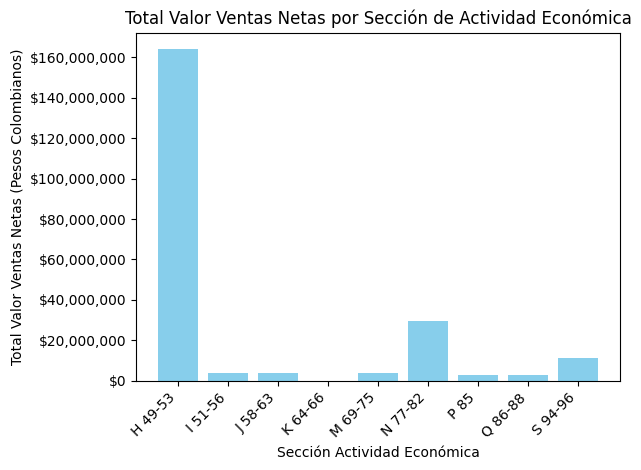

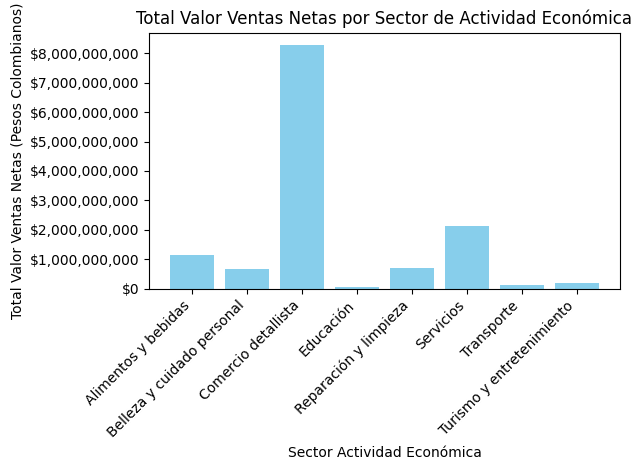

In [23]:
# CÁMARA

secciones = ['H 49-53',
             'I 51-56',
             'J 58-63',
             'K 64-66',
             'M 69-75',
             'N 77-82',
             'P 85',
             'Q 86-88',
             'S 94-96']
ventas_netas = [163833000, 3750000, 4000000, 100000, 3867061, 29600000, 2800000, 3050000, 11350000]

plt.bar(secciones, ventas_netas, color='skyblue')
plt.xlabel('Sección Actividad Económica')
plt.ylabel('Total Valor Ventas Netas (Pesos Colombianos)')
plt.title('Total Valor Ventas Netas por Sección de Actividad Económica')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f"${y:,.0f}"))

plt.tight_layout()
plt.show()

# BASE EMPRESA

plt.bar(sectores, ventas_netas_sectores, color='skyblue')
plt.xlabel('Sector Actividad Económica')
plt.ylabel('Total Valor Ventas Netas (Pesos Colombianos)')
plt.title('Total Valor Ventas Netas por Sector de Actividad Económica')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f"${y:,.0f}"))

plt.tight_layout()

**KPIs:**

Ganancias Totales por Sector:
En tu empresa, el sector de Comercio Detallista lidera con una ganancia total de 8,278,729,577, seguido por Servicios (2,124,597,436) y Alimentos y Bebidas (1,129,292,667).
En la base de datos de la cámara de comercio, el sector de Transporte y Almacenamiento es el más destacado con 163,833,000, seguido por Alojamiento y Servicios de Comida (3,750,000) y Actividades de Servicios Administrativos y de Apoyo (29,600,000).



**Insights:**

Comparación de Sectores Principales:

Los tres sectores principales de la empresa son Comercio Detallista, Servicios y Alimentos y Bebidas. Estos sectores pueden considerarse como los pilares del negocio en términos de ganancias.

En contraste, los sectores principales en la base de datos de la cámara de comercio son Transporte y Almacenamiento, Servicios Administrativos y de Apoyo, y Alojamiento y Servicios de Comida. Esto indica diferencias significativas en los sectores predominantes entre la empresa y la industria en general.

Oportunidades de Diversificación:
Dado que los sectores de Comercio Detallista, Servicios y Alimentos y Bebidas representan la mayor parte de las ganancias en tu empresa, podríamos considerar expandirnos o diversificar las operaciones dentro de estos sectores para aumentar aún más los ingresos.

Por otro lado, si se están buscando oportunidades de crecimiento en otros sectores, podríamos explorar las actividades relacionadas con el Transporte y Almacenamiento, que muestran un potencial interesante según los datos de la cámara de comercio.

Tendencias Temporales:
Sería útil analizar las tendencias temporales de las ganancias en los sectores clave para identificar patrones estacionales o cambios en la demanda que puedan influir en las decisiones comerciales futuras.

**GANANCIA MENSUAL POR COMERCIO**

Para determinar que tan rentables son los negocios que utilizan nuestros datafonos, debemos realizar un conteo de la cantidad de empresas que existen bajo nuestra base de datos.

In [24]:
#GANANCIA MENSUAL Y QUE APORTA CADA COMERCIO

print(clientes_limpio['Categoria comercio'].value_counts())

Categoria comercio
Comercio detallista           1650
Servicios                      520
Alimentos y bebidas            384
Belleza y cuidado personal     209
Reparación y limpieza          166
Transporte                      76
Turismo y entretenimiento       35
Educación                       10
Name: count, dtype: int64


Luego de saber cuales son las secciones que se encuentran con empresas vigentes, procederemos a obtener el total de las ganancias por cada sector en los últimos 6 meses.

In [25]:
suma_por_sector = clientes_limpio.groupby('Categoria comercio')['Monto ventas Acumulado'].sum()

def formato_pesos(valor):
    return f"${valor:,.0f}"

suma_por_sector = suma_por_sector.map(formato_pesos)

# Mostrar la sumatoria por municipio
print(suma_por_sector)

Categoria comercio
Alimentos y bebidas           $1,129,292,667
Belleza y cuidado personal      $654,753,707
Comercio detallista           $8,278,729,577
Educación                        $44,225,525
Reparación y limpieza           $705,665,517
Servicios                     $2,124,597,436
Transporte                      $113,747,315
Turismo y entretenimiento       $179,638,588
Name: Monto ventas Acumulado, dtype: object


Para tener los datos de una forma organizada, se organizó en una tabla de dos variables en donde sus valores se encuentran en un formato de pesos colombianos. Para esto utilizamos como referencia la fecha de la primera transacción y asi obtener los 6 meses sobre los que se está haciendo el estudio (diciembre, enero, febrero, marzo, abril y mayo). La otra variante será la sección económica a evaluar.

In [84]:
def formato_pesos(valor):
    return f"${valor:,.0f}"

clientes_limpio['Fecha 1ra_transaccion'] = pd.to_datetime(clientes_limpio['Fecha 1ra_transaccion']).copy()

#Columna para el mes
clientes_limpio['Mes'] = clientes_limpio['Fecha 1ra_transaccion'].dt.month.copy()

meses = {
    1: 'enero',
    2: 'febrero',
    3: 'marzo',
    4: 'abril',
    5: 'mayo',
    12: 'diciembre'
        }

clientes_limpio['Mes'] = clientes_limpio['Mes'].map(meses)
orden_meses = ['diciembre', 'enero', 'febrero', 'marzo', 'abril', 'mayo']

tabla_pivote = clientes_limpio.pivot_table(index='Categoria comercio', columns='Mes', values='Monto ventas Acumulado', aggfunc='sum').copy()
tabla_pivote = tabla_pivote.reindex(columns=orden_meses)
tabla_pivote = tabla_pivote.applymap(formato_pesos).copy()
tabla_pivote

<ipython-input-84-73ccc7417415>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clientes_limpio['Fecha 1ra_transaccion'] = pd.to_datetime(clientes_limpio['Fecha 1ra_transaccion']).copy()
<ipython-input-84-73ccc7417415>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clientes_limpio['Mes'] = clientes_limpio['Fecha 1ra_transaccion'].dt.month.copy()
<ipython-input-84-73ccc7417415>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

Mes,diciembre,enero,febrero,marzo,abril,mayo
Categoria comercio,,,,,,
Alimentos y bebidas,"$103,304,351","$19,846,470","$290,929,341","$711,715,905","$3,493,600","$3,000"
Belleza y cuidado personal,"$171,351,189","$76,239,415","$212,884,600","$192,116,803","$870,300","$1,291,400"
Comercio detallista,"$656,918,638","$1,372,865,370","$2,044,301,085","$4,195,803,393","$6,890,691","$1,892,400"
Educación,$nan,"$31,700","$10,073,000","$34,120,825",$nan,$nan
Reparación y limpieza,"$58,272,075","$188,987,083","$152,787,020","$305,478,339",$nan,"$141,000"
Servicios,"$607,548,332","$226,660,860","$239,364,995","$1,048,183,249","$2,840,000",$nan
Transporte,"$843,000","$642,000","$10,515,955","$101,253,870",$nan,"$492,490"
Turismo y entretenimiento,"$8,342,000","$4,000","$81,381,258","$89,911,330",$nan,$nan


La tabla presentada es más fácil de interpretar ya que presenta las ganancias económicas recogidas durante los 6 meses presentados. Demuestra como se coportó el mercado para las diferentes secciones presentadas. Los elementos que se encuentran de forma nula, significan que no existieron transacciones durante los últimos dos meses, lo que presenta una baja para las secciones Educación, Reparación y limpieza, Transporte y Turismo y entretenimiento.

Luego, se procede a obtener la ganancia que tendrá nuestra empresa a partir de la utilización de los datafonos (3%).

In [86]:
# Calcular la ganancia para la empresa (3% del monto de ventas acumulado por cada transacción)
clientes_limpio['Ganancia'] = clientes_limpio['Monto ventas Acumulado'] * 0.03
clientes_limpio

<ipython-input-86-632043f46ad0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clientes_limpio['Ganancia'] = clientes_limpio['Monto ventas Acumulado'] * 0.03


,Id_comercio,Fecha vinculación datafono,Fecha de creacion comercio,Categoria comercio,Sub Categoria comercio,Id_terminal,Ciudad,Fecha 1ra_transaccion,Monto ventas Acumulado,Monto ventas ultimo mes,Cantidad transacciones acumuladas a la fecha,Mes,Ganancia,Proyeccion_3_meses,Monto ventas Acumulado Normalizado
0,003QDVFJCJ,2021-03-26 12:40:00,2021-03-26 12:17:00,Comercio detallista,Ropa / Accesorios,1299,Bogotá D.C.,2021-03-26 12:42:00,6542000,1240000,44,marzo,196260.0,4.948446e+13,0.081427
1,008LJH6YHN,2021-02-10 15:31:00,2021-02-10 15:15:00,Belleza y cuidado personal,Spa,591,Bogotá D.C.,2021-02-10 15:34:00,4380000,1102000,16,febrero,131400.0,4.948446e+13,0.054513
2,00B3DGV62G,2021-03-03 15:26:00,2021-03-03 15:09:00,Comercio detallista,Auto partes,2130,Bogotá D.C.,2021-03-03 15:30:00,11892500,1297000,89,marzo,356775.0,4.948446e+13,0.148035
3,00ILW1BB3Y,2021-03-24 12:45:00,2021-03-24 12:33:00,Comercio detallista,Tienda naturista,662,Bogotá D.C.,2021-03-24 12:51:00,372500,74500,12,marzo,11175.0,4.948446e+13,0.004625
4,01AK7UX4UU,2021-03-30 13:50:00,2021-03-30 13:40:00,Comercio detallista,Tecnología,1784,Mosquera,2021-03-30 13:52:00,165500,0,4,marzo,4965.0,4.948446e+13,0.002048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066,ZYU8UUM32R,2021-03-11 11:24:00,2021-03-11 11:14:00,Comercio detallista,Tecnología,2829,Bogotá D.C.,2021-03-11 11:30:00,26110920,4912000,34,marzo,783327.6,4.948446e+13,0.325036
3067,ZYV1ZCZ7IM,2021-03-25 14:46:00,2021-03-25 14:36:00,Servicios,Tecnología y software,1348,Bogotá D.C.,2021-03-25 14:47:00,4400500,491000,16,marzo,132015.0,4.948446e+13,0.054768
3068,ZZJ3KWF9VC,2021-03-19 16:09:00,2021-03-19 16:00:00,Alimentos y bebidas,Restaurante / Café,2938,Bogotá D.C.,2021-03-19 16:12:00,65100,20000,6,marzo,1953.0,4.948446e+13,0.000798
3069,ZZMG2NE0Q6,2021-03-12 11:05:00,2021-03-12 10:49:00,Comercio detallista,Elementos de seguridad,1908,Bogotá D.C.,2021-03-12 11:06:00,300000,149000,8,marzo,9000.0,4.948446e+13,0.003722


Teniendo en cuenta que a la empresa le cuesta 500,000, se tendrá en cuenta el costo de adquisición de clientes (CAC), se refiere a una métrica que revela cuánto dinero se gasta una empresa para adquirir un nuevo consumidor. Con este concepto determinaremos si se esta generando suficiente ingreso ('Ganancia'$500,000). Se separaran los negocios que hayan producido 500,000 o más en el 3% total de las ventas acumuladas

In [87]:
clientes_filtrados = clientes_limpio.loc[clientes_limpio['Ganancia'] >= 500000]
clientes_filtrados

,Id_comercio,Fecha vinculación datafono,Fecha de creacion comercio,Categoria comercio,Sub Categoria comercio,Id_terminal,Ciudad,Fecha 1ra_transaccion,Monto ventas Acumulado,Monto ventas ultimo mes,Cantidad transacciones acumuladas a la fecha,Mes,Ganancia,Proyeccion_3_meses,Monto ventas Acumulado Normalizado
62,0PTFQVKSQS,2021-03-04 08:11:00,2021-03-04 07:57:00,Transporte,Servicio especial,92,Cali,2021-03-04 08:20:00,21921280,8861780,95,marzo,657638.4,4.948446e+13,0.272881
82,0YNDKGAXNL,2021-02-01 12:58:00,2021-02-01 12:52:00,Comercio detallista,Óptica,424,Bogotá D.C.,2021-02-01 13:01:00,44343000,5827000,170,febrero,1330290.0,4.948446e+13,0.552004
144,1KDUK7LEUV,2020-12-28 16:15:00,2020-12-28 15:57:00,Comercio detallista,Óptica,382,Bogotá D.C.,2020-12-28 16:20:00,27422000,1110000,93,diciembre,822660.0,4.948446e+13,0.341358
145,1KN3L6Z878,2021-03-19 17:37:00,2021-03-19 17:31:00,Comercio detallista,Ropa / Accesorios,2537,Bogotá D.C.,2021-03-19 17:38:00,18288800,2809800,93,marzo,548664.0,4.948446e+13,0.227661
182,1XPC927A39,2021-03-12 11:47:00,2021-03-12 11:29:00,Alimentos y bebidas,Bar / Club / Discoteca,1510,Bogotá D.C.,2021-03-12 11:49:00,33846000,7017000,296,marzo,1015380.0,4.948446e+13,0.421329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3014,ZBB5JOFDMW,2021-03-11 13:43:00,2021-03-11 13:34:00,Comercio detallista,Tecnología,2446,Bogotá D.C.,2021-03-11 13:46:00,66773400,9345000,270,marzo,2003202.0,4.948446e+13,0.831234
3016,ZBK5AGY1CD,2021-03-26 16:30:00,2021-03-26 16:11:00,Comercio detallista,Elementos de seguridad,2519,Bogotá D.C.,2021-03-26 16:34:00,22561500,6018000,31,marzo,676845.0,4.948446e+13,0.280851
3029,ZGKK4JFNWU,2021-01-28 16:27:00,2021-01-28 16:17:00,Comercio detallista,Tecnología,186,Soacha,2021-01-28 16:31:00,32411000,2450000,95,enero,972330.0,4.948446e+13,0.403465
3057,ZSFL7XYBEZ,2021-03-11 11:37:00,2021-03-11 11:30:00,Servicios,Tecnología y software,2456,Bogotá D.C.,2021-03-11 11:47:00,23417000,2778000,18,marzo,702510.0,4.948446e+13,0.291500


Ahora, se tienen las ganancias obtenidas para la empresa por cada sección de comercio que se tiene en la base de datos. Como era de esperarse, las secciones Comercio detallista, alimentos y bebidas, y servicios fueron las que dejaron más ganancias en el periodo de los primeros de los últimos 6 meses de la base de datos de la empresa, pudiendo suponerse que son los que engloban las festividades.

In [29]:
clientes_filtrados = clientes_filtrados.groupby('Categoria comercio')['Ganancia'].sum()

def formato_pesos(valor):
    return f"${valor:,.0f}"

clientes_filtrados = clientes_filtrados.map(formato_pesos)

clientes_filtrados

Categoria comercio
Alimentos y bebidas           $10,896,980
Belleza y cuidado personal     $8,276,690
Comercio detallista           $96,856,786
Educación                        $714,810
Reparación y limpieza          $6,782,604
Servicios                     $22,591,293
Transporte                     $1,620,288
Turismo y entretenimiento      $3,532,204
Name: Ganancia, dtype: object

**UTILIZACIÓN DE MODELOS DE MACHINE LEARNING**

2 modelos de aprendizaje de maquina fueron escogidos para realizar una comparación de los resultados y determinar cual es el más adecuado para determinar decisiones positivas para los siguientes 3 meses.



Se utilizó la Regresión Lineal Simple por la simplicidad de implementación del modelo, la facilidad de interpretación de los coeficientes y su baja probabilidad de caer en un reajuste.

También se utilizó la Regresión Lineal Regularizada por su capacidad de proporcionar estabilidad al modelo, su flexibilidad basada en la utilización de hiperparámetros de regularización y su control de sobreajuste.

Se escogieron 4 variables totales, dos que son categóricas y dos que son numéricas. Para proporcionarle variabilidad de datos al modelo y así tener un resultado estable; también se deseo crear una relaci+on entre las regiones de los comercios, sus sectores, y las ganancias realizadas en la totalidad de los 6 meses y su último mes, este último con el fin de brindarle la actividad más reciente al modelo para poder obtener una correcta predicción.

Cabe aclarar que estos modelos normalmente requieren de una gran cantidad de datos para obtener una buena estabilidad y así tener un una medida de precisión del modelo correcta. Es necesario tener en cuenta que se realizó una depuración de los datos iniciales y se descartaron variables que pudieran no estar relacionadas con los resultados finales.

*Regresión lineal simple*

In [78]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Separar las características y la variable objetivo
X = clientes_limpio[['Monto ventas ultimo mes', 'Ciudad', 'Categoria comercio']]
y = clientes_limpio['Monto ventas Acumulado']

#Codificar las variables categóricas
X = pd.get_dummies(X, columns=['Ciudad', 'Categoria comercio'])

#Normalizar las características
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

#Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

#Entrenar el modelo de regresión lineal regularizada (Ridge)
modelo = Ridge(alpha=1.0)
modelo.fit(X_train, y_train)

#Realizar predicciones en el conjunto de prueba
predicciones = modelo.predict(X_test)

#Evaluar el modelo
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predicciones)
print('Error cuadrático medio:', mse)


Error cuadrático medio: 19349452446369.477


*Regresión lineal regularizada*

In [88]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Separar las características y la variable objetivo
X = clientes_limpio[['Monto ventas ultimo mes', 'Ciudad', 'Categoria comercio']]
y = clientes_limpio['Monto ventas Acumulado']

#Codificar las variables categóricas
X = pd.get_dummies(X, columns=['Ciudad', 'Categoria comercio'])

#Normalizar las características
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

#Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

#Entrenar el modelo de regresión lineal simple
modelo = LinearRegression()
modelo.fit(X_train, y_train)

#Realizar predicciones en el conjunto de prueba
predicciones = modelo.predict(X_test)

#Evaluar el modelo (por ejemplo, calcular el error cuadrático medio)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predicciones)
print('Error cuadrático medio:', mse)


Error cuadrático medio: 3.822021144072973e+41


**RAZONES SOBRE LAS FALLAS EN LOS MODELOS**

El error cuadrático medio (MSE, por sus siglas en inglés) se utiliza para determinar la calidad de un modelo de regresión. Representa el promedio de los cuadrados de las diferencias entre los valores predichos por el modelo y los valores reales. Cuanto menor sea el valor del MSE, mejor será el modelo.

En el caso de los datos de la empresa, el MSE es bastante alto para ambos modelos, lo que indica que las predicciones del modelo se encuentran bastante alejadas de los valores reales. Esto puede significar que el modelo es demasiado simple para capturar la complejidad de los datos.